In [1]:
from ubibetter.models.compute_fraction  import compute_fraction
from ubibetter.utils.data.get_neigbours import get_neighbours
from ubibetter.models.compute_fraction import compute_fraction
from betbrain.manager.data_manager import data_manager

import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dm = data_manager(sport='Basket')

In [3]:
data = dm.__get_data__()

In [4]:
data.head()

odds        \
                                                                      0     1   
MatchDate  HomeTeam            AwayTeam           bkmr                          
2009-10-27 Cleveland Cavaliers Boston Celtics     bet365_op_ha_    2.70  1.50   
                                                  pinnacle_op_ha_  2.80  1.51   
           Dallas Mavericks    Washington Wizards bet365_op_ha_    4.20  1.25   
                                                  pinnacle_op_ha_  4.40  1.27   
2009-10-28 Atlanta Hawks       Indiana Pacers     bet365_op_ha_    4.25  1.23   

                                                                   prob        \
                                                                      0     1   
MatchDate  HomeTeam            AwayTeam           bkmr                          
2009-10-27 Cleveland Cavaliers Boston Celtics     bet365_op_ha_    0.36  0.64   
                                                  pinnacle_op_ha_  0.35  0.65   
           Dallas Mavericks    Washington Wizards bet365_op_ha_    0.23  0.77   
                                                  pinnacle_op_ha_  0.22  0.78   
2009-10-28 Atlanta Hawks       Indiana Pacers     bet365_op_ha_    0.22  0.78   

                                                                    book FTR  
                                                                              
MatchDate  HomeTeam            AwayTeam           bkmr                        
2009-10-27 Cleveland Cavaliers Boston Celtics     bet365_op_ha_    0.037   0  
                                                  pinnacle_op_ha_  0.019   0  
           Dallas Mavericks    Washington Wizards bet365_op_ha_    0.038   0  
                                                  pinnacle_op_ha_  0.015   0  
2009-10-28 Atlanta Hawks       Indiana Pacers     bet365_op_ha_    0.048   1

In [5]:
train = data[data.index.get_level_values(0) < datetime(2017, 1, 1)]
test  = data[data.index.get_level_values(0) > datetime(2017, 1, 1)]

In [6]:
matrix = dm.ubibetter.get_matrix(train,[('prob', 0), ('prob', 1), 'FTR'])

/Users/Gabriele/Library/Mobile Documents/com~apple~CloudDocs/Kellify/Projects/ubipy/env/lib/python3.7/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [7]:
matrix.head()

FTR                    0      1
(prob, 0) (prob, 1)            
0.01      0.99       0.0    2.0
0.02      0.98       0.0   10.0
0.03      0.97       0.0   46.0
0.04      0.96       3.0  102.0
0.05      0.95       7.0  221.0

In [10]:
test = matrix[matrix.sum(axis=1) > 1000]
test = test.divide(test.sum(axis=1), axis=0)
test.index = test.index.get_level_values(1)

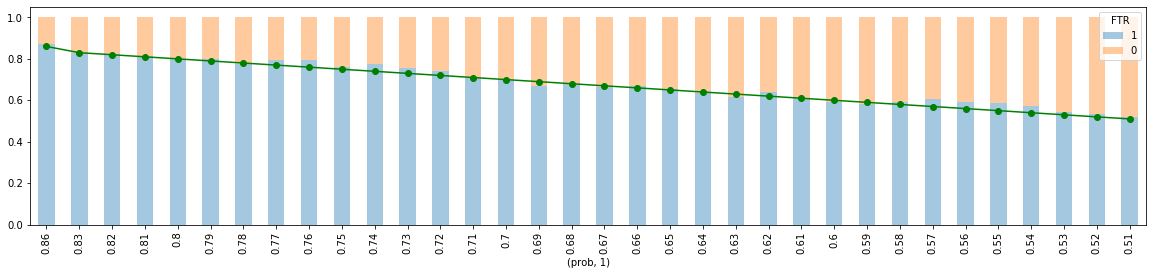

In [11]:
fig, ax = plt.subplots(figsize=(20, 4))
test[[1, 0]].plot(ax=ax, kind='bar', stacked=True, alpha=0.4)
ax.plot(list(test.index), color = 'green', marker='o')
plt.show()